In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## 1. Understand the dataset:

In [2]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


### Identify the shape of the dataset

In [3]:
df.shape

(364558, 53)

In [4]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### Identify variables with null values

In [5]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

## 2. Perform basic data exploratory analysis:

In [6]:
df['Closed Date']=pd.to_datetime(df['Closed Date'])

In [7]:
df['Closed Date'].isnull().sum()

2381

### Utilize missing value treatment

In [8]:
df=df.fillna({'Descriptor':'Unknown','Location Type':'Unknown','Incident Zip':'0','Incident Address':'Unknown','Street Name':'unknown','Cross Street 1':'unknown','Cross Street 2':'unknown','Address Type':'unknown','City':'unknown','Facility Type':'unknown','Status':'unknown','Resolution Action Updated Date':'0','X Coordinate (State Plane)':'0','Y Coordinate (State Plane)':'0','Location':'0'})

In [9]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                          0
Incident Zip                           0
Incident Address                       0
Street Name                            0
Cross Street 1                         0
Cross Street 2                         0
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                           0
City                                   0
Landmark                          364183
Facility Type                          0
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date         0
Community Board                        0
Borough         

In [10]:
df=df.drop(['Intersection Street 1', 'Intersection Street 2','Landmark', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  object        
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      364558 non-null  object        
 7   Location Type                   364558 non-null  object        
 8   Incident Zip                    364558 non-null  object        
 9   Incident Address                364558 non-null  object        
 10  Street Name                     364558 non-null  object 

### Analyze the date column and remove the entries if it has an incorrect timeline

In [12]:
df['Closed Date']= pd.to_datetime(df['Closed Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  object        
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      364558 non-null  object        
 7   Location Type                   364558 non-null  object        
 8   Incident Zip                    364558 non-null  object        
 9   Incident Address                364558 non-null  object        
 10  Street Name                     364558 non-null  object 

In [13]:
df[df.isnull().any(axis=1)]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,2016-01-02 01:04:03,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,0,25-0-25-54 12TH STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
283,32309451,12/31/2015 05:40:16 PM,2016-01-01 10:59:11,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,0,72-23-72-2 72ND PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
302,32309860,12/31/2015 05:05:30 PM,2016-01-01 08:17:35,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,0,9-15-9-99 CORNAGA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
416,32305700,12/31/2015 02:16:04 PM,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,0,5426-5526 90TH ST,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
434,32306605,12/31/2015 01:51:35 PM,2015-12-31 14:32:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11377.0,51 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363789,29619230,01/02/2015 07:25:16 AM,NaT,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,0,2101-2527 INDEPENDENCE AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
363805,29618672,01/02/2015 06:14:06 AM,NaT,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,0,217-0-217- 89TH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
364053,29618280,01/01/2015 07:24:31 PM,2015-01-01 23:44:53,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,0,106 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0
364151,29617561,01/01/2015 04:04:35 PM,NaT,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,0,6940-6966 62ND AVE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,0


In [14]:
df['Closed Date'].fillna(0)
df['Closed Date']

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 364558, dtype: datetime64[ns]

## Draw a frequency plot for city-wise complaints

In [15]:
f=df['City'].value_counts()
f

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
unknown                  2997
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE  

Text(0.5, 1.0, 'Frequency of complaints across cities')

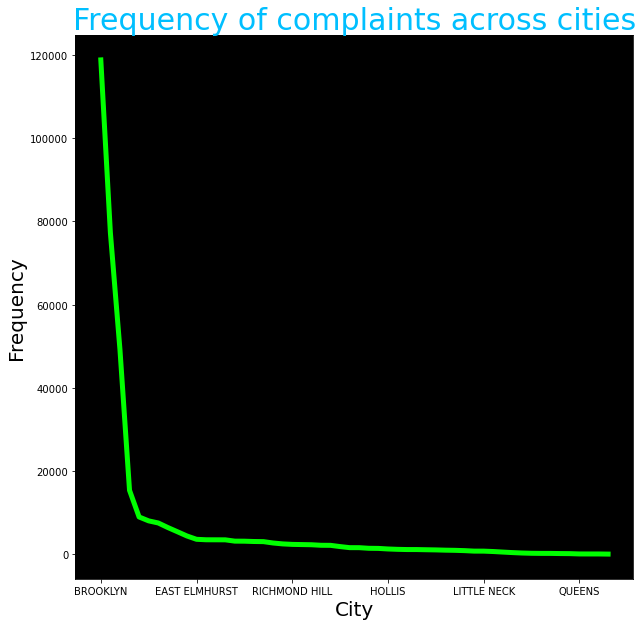

In [16]:
f.plot(figsize=(10,10),color='lime',linewidth=5).set_facecolor('black')
plt.xlabel('City',size=20)
plt.ylabel('Frequency',size=20)
plt.title("Frequency of complaints across cities",size=30,color='deepskyblue')

## Scatter and Hexbin plots for complaint concentration across Brooklyn

In [17]:
df[df['City']=='BROOKLYN'].groupby(['Borough',"Complaint Type","Descriptor"]).size()

Borough    Complaint Type             Descriptor                    
BROOKLYN   Animal Abuse               Chained                             211
                                      In Car                               79
                                      Neglected                          1573
                                      No Shelter                          275
                                      Other (complaint details)           718
                                      Tortured                            335
           Bike/Roller/Skate Chronic  Unknown                             124
           Blocked Driveway           No Access                         28091
                                      Partial Access                     8356
           Derelict Vehicle           With License Plate                 6259
           Disorderly Youth           Nuisance/Truant                      16
                                      Playing in Unsuitable Place        

In [18]:
df[df['City']=='BROOKLYN'].groupby(['Borough',"Complaint Type","Descriptor"]).head(20)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,32306554,12/31/2015 11:56:30 PM,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,12/31/2015 11:53:58 PM,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,12/31/2015 11:47:58 PM,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,12/31/2015 11:44:52 PM,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,12/31/2015 11:40:59 PM,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318838,30118976,03/07/2015 05:11:14 AM,2015-03-07 05:50:43,NYPD,New York City Police Department,Drinking,After Hours - Licensed Est,Club/Bar/Restaurant,11204.0,2213 65 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.613614,-73.981040,"(40.6136138136122, -73.98104020391618)"
325047,30062199,02/27/2015 12:58:47 PM,2015-02-27 14:07:56,NYPD,New York City Police Department,Posting Advertisement,Building,Residential Building/House,11201.0,293 HICKS STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.692618,-73.997108,"(40.692618392736, -73.99710794570123)"
330395,29996266,02/20/2015 03:06:45 PM,2015-02-20 21:37:29,NYPD,New York City Police Department,Posting Advertisement,Building,Residential Building/House,11201.0,293 HICKS STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.692618,-73.997108,"(40.692618392736, -73.99710794570123)"
341093,29879199,02/05/2015 03:06:28 PM,2015-02-05 22:10:56,NYPD,New York City Police Department,Disorderly Youth,Nuisance/Truant,Residential Building/House,11212.0,335 SUTTER AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.667590,-73.907190,"(40.6675898319166, -73.90718978180685)"


In [19]:
d=df[df['City']=='BROOKLYN']

In [20]:
d['Latitude']=d['Latitude'].dropna()
d['Longitude']=d['Longitude'].dropna()

## HEXBIN PLOT

(-74.05061403048781, -73.8464793432815, 40.561126853754885, 40.78979838623255)

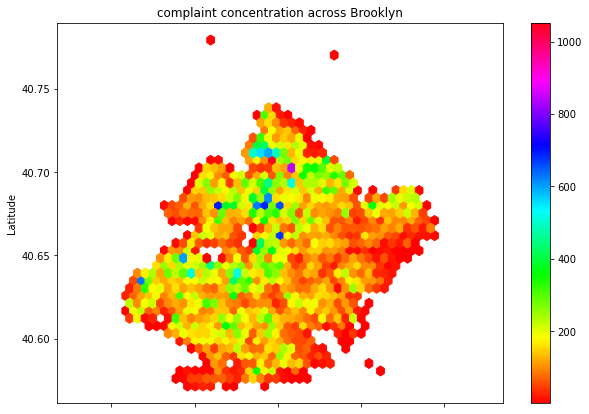

In [21]:
d.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
     cmap="hsv",mincnt=1,title = 'complaint concentration across Brooklyn', figsize=(10,7)).axis('equal')

## SCATTER PLOT

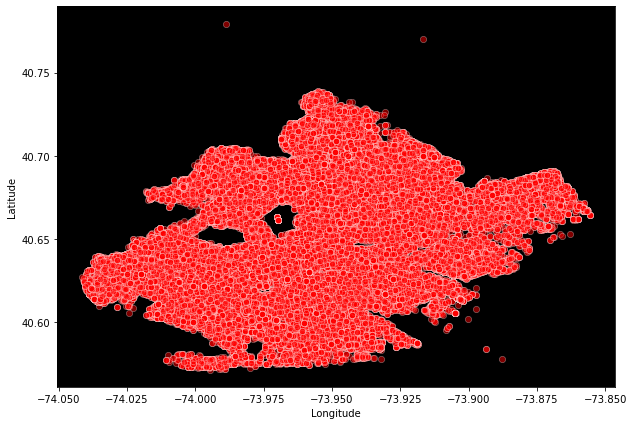

In [22]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=d['Longitude'], y=d['Latitude'],color='red' ,marker = 'o', alpha = 0.5,s=40).set_facecolor('black')

Text(0.5, 1.0, 'Complaints Type\n')

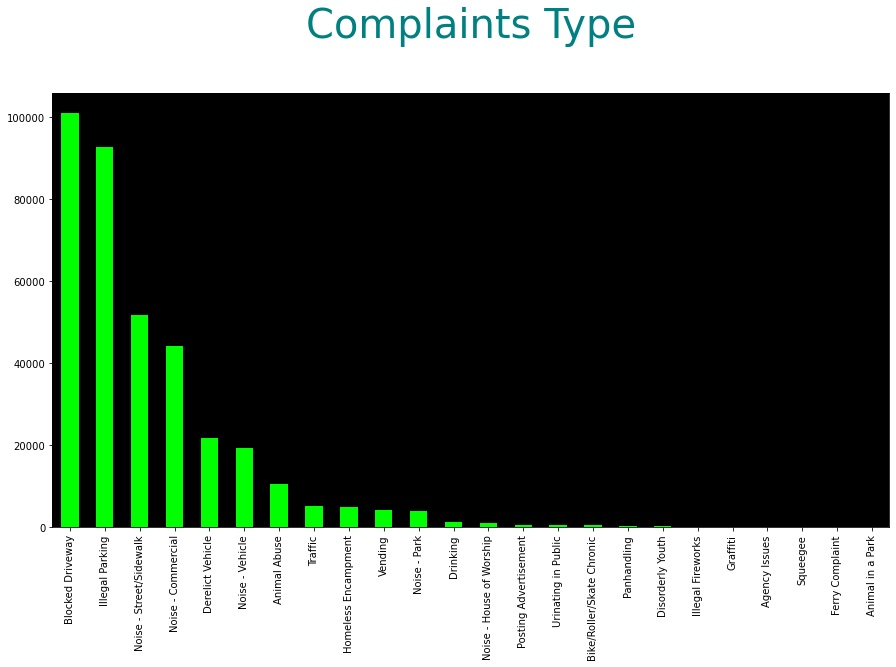

In [23]:
df['Complaint Type'].value_counts().plot.bar(figsize=(15,8), color="lime").set_facecolor('black')
plt.title("Complaints Type\n",size=40,color='teal')


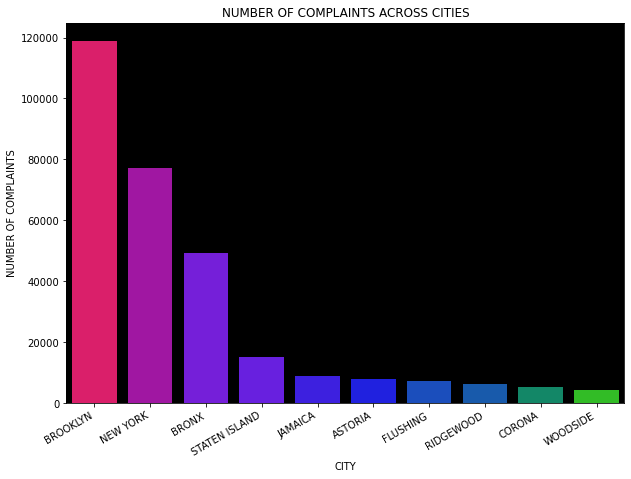

In [77]:
plt.figure(figsize = (10,7))
plt.title("NUMBER OF COMPLAINTS ACROSS CITIES")
ax=sns.countplot(df["City"], order = df["City"].value_counts().head(10).index,palette='prism')
ax.set(xlabel='CITY', ylabel='NUMBER OF COMPLAINTS')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_facecolor('black')
plt.show()

# Top 10 types of complaints

In [26]:
r=pd.DataFrame(df['Complaint Type'].value_counts().head(10))
r

,Complaint Type
Blocked Driveway,100881
Illegal Parking,92679
Noise - Street/Sidewalk,51692
Noise - Commercial,44109
Derelict Vehicle,21661
Noise - Vehicle,19352
Animal Abuse,10541
Traffic,5198
Homeless Encampment,4879
Vending,4192


<AxesSubplot:ylabel='Complaint Type'>

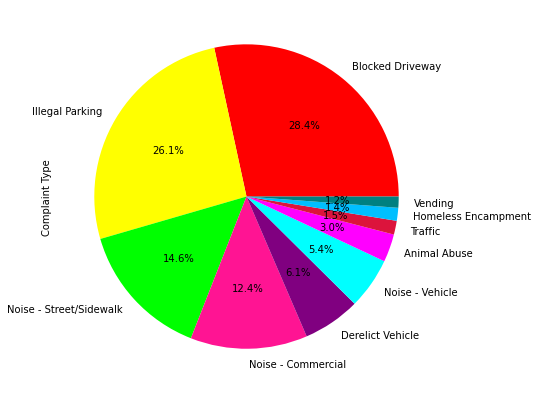

In [27]:
df['Complaint Type'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%',
                        figsize = (7,7),colors=['red','yellow','lime','deeppink','purple','aqua','magenta','crimson','deepskyblue','teal'])

In [28]:
df2=df[['City','Borough',"Complaint Type","Descriptor"]]
df2

,City,Borough,Complaint Type,Descriptor
0,NEW YORK,MANHATTAN,Noise - Street/Sidewalk,Loud Music/Party
1,ASTORIA,QUEENS,Blocked Driveway,No Access
2,BRONX,BRONX,Blocked Driveway,No Access
3,BRONX,BRONX,Illegal Parking,Commercial Overnight Parking
4,ELMHURST,QUEENS,Illegal Parking,Blocked Sidewalk
...,...,...,...,...
364553,WOODHAVEN,QUEENS,Illegal Parking,Blocked Hydrant
364554,BRONX,BRONX,Noise - Vehicle,Car/Truck Horn
364555,NEW YORK,MANHATTAN,Noise - Street/Sidewalk,Loud Music/Party
364556,BRONX,BRONX,Blocked Driveway,No Access


In [29]:
df2.columns

Index(['City', 'Borough', 'Complaint Type', 'Descriptor'], dtype='object')

In [30]:
df[df['City']=='BROOKLYN'].groupby(['Borough',"Complaint Type","Descriptor"]).head(20)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
5,32306554,12/31/2015 11:56:30 PM,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,12/31/2015 11:53:58 PM,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,12/31/2015 11:47:58 PM,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,12/31/2015 11:44:52 PM,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,12/31/2015 11:40:59 PM,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318838,30118976,03/07/2015 05:11:14 AM,2015-03-07 05:50:43,NYPD,New York City Police Department,Drinking,After Hours - Licensed Est,Club/Bar/Restaurant,11204.0,2213 65 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.613614,-73.981040,"(40.6136138136122, -73.98104020391618)"
325047,30062199,02/27/2015 12:58:47 PM,2015-02-27 14:07:56,NYPD,New York City Police Department,Posting Advertisement,Building,Residential Building/House,11201.0,293 HICKS STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.692618,-73.997108,"(40.692618392736, -73.99710794570123)"
330395,29996266,02/20/2015 03:06:45 PM,2015-02-20 21:37:29,NYPD,New York City Police Department,Posting Advertisement,Building,Residential Building/House,11201.0,293 HICKS STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.692618,-73.997108,"(40.692618392736, -73.99710794570123)"
341093,29879199,02/05/2015 03:06:28 PM,2015-02-05 22:10:56,NYPD,New York City Police Department,Disorderly Youth,Nuisance/Truant,Residential Building/House,11212.0,335 SUTTER AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.667590,-73.907190,"(40.6675898319166, -73.90718978180685)"


## Display the types of complaints in each city in a separate dataset

In [38]:
majorcomplints=s.groupby(['City',"Complaint Type"])

sortedComplaintType = majorcomplints.size().sort_values(ascending = False)
sortedComplaintType.head(10)

City      Complaint Type         
BROOKLYN  Blocked Driveway           36447
          Illegal Parking            33533
NEW YORK  Noise - Street/Sidewalk    22252
          Noise - Commercial         18692
BRONX     Blocked Driveway           17063
NEW YORK  Illegal Parking            14553
BROOKLYN  Noise - Street/Sidewalk    13984
          Noise - Commercial         13860
BRONX     Illegal Parking             9889
          Noise - Street/Sidewalk     9146
dtype: int64

In [39]:
complaintTypecity = pd.DataFrame({'count':
                                  df2.groupby(['City','Complaint Type']).size()}).reset_index()

In [40]:
complaintTypecity

,City,Complaint Type,count
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
790,unknown,Noise - Vehicle,58
791,unknown,Panhandling,3
792,unknown,Posting Advertisement,1
793,unknown,Traffic,3


In [43]:
df.iloc[21]

Unique Key                                                                 32307994
Created Date                                                 12/31/2015 11:38:51 PM
Closed Date                                                     2016-01-01 09:11:33
Agency                                                                         NYPD
Agency Name                                         New York City Police Department
Complaint Type                                                      Illegal Parking
Descriptor                                            Posted Parking Sign Violation
Location Type                                                       Street/Sidewalk
Incident Zip                                                                11379.0
Incident Address                                          78-42 METROPOLITAN AVENUE
Street Name                                                     METROPOLITAN AVENUE
Cross Street 1                                                            79

In [44]:
df.groupby('City').size()

City
ARVERNE                   259
ASTORIA                  7991
Astoria                   906
BAYSIDE                  1550
BELLEROSE                 487
BREEZY POINT               31
BRONX                   49171
BROOKLYN               118862
CAMBRIA HEIGHTS           617
CENTRAL PARK              110
COLLEGE POINT            1544
CORONA                   5383
EAST ELMHURST            3558
ELMHURST                 3438
East Elmhurst              30
FAR ROCKAWAY             1397
FLORAL PARK               196
FLUSHING                 7487
FOREST HILLS             2122
FRESH MEADOWS            2453
GLEN OAKS                 361
HOLLIS                   1231
HOWARD BEACH             1144
Howard Beach                1
JACKSON HEIGHTS          2106
JAMAICA                  8932
KEW GARDENS              1008
LITTLE NECK               712
LONG ISLAND CITY         3028
Long Island City          170
MASPETH                  3118
MIDDLE VILLAGE           2291
NEW HYDE PARK             129
NEW Y

In [45]:
gb=df.groupby(['City','Borough','Complaint Type'])

In [46]:
gb.size()

City     Borough      Complaint Type       
ARVERNE  QUEENS       Animal Abuse             46
                      Blocked Driveway         50
                      Derelict Vehicle         32
                      Disorderly Youth          2
                      Drinking                  1
                                               ..
unknown  Unspecified  Noise - Vehicle          58
                      Panhandling               3
                      Posting Advertisement     1
                      Traffic                   1
                      Vending                   7
Length: 819, dtype: int64

In [47]:
gb.size().to_frame()

0
City    Borough     Complaint Type           
ARVERNE QUEENS      Animal Abuse           46
                    Blocked Driveway       50
                    Derelict Vehicle       32
                    Disorderly Youth        2
                    Drinking                1
...                                        ..
unknown Unspecified Noise - Vehicle        58
                    Panhandling             3
                    Posting Advertisement   1
                    Traffic                 1
                    Vending                 7

[819 rows x 1 columns]

In [48]:
counts=gb.size().to_frame().reset_index()

In [49]:
counts[:20]

,City,Borough,Complaint Type,0
0,ARVERNE,QUEENS,Animal Abuse,46
1,ARVERNE,QUEENS,Blocked Driveway,50
2,ARVERNE,QUEENS,Derelict Vehicle,32
3,ARVERNE,QUEENS,Disorderly Youth,2
4,ARVERNE,QUEENS,Drinking,1
5,ARVERNE,QUEENS,Graffiti,1
6,ARVERNE,QUEENS,Homeless Encampment,4
7,ARVERNE,QUEENS,Illegal Parking,62
8,ARVERNE,QUEENS,Noise - Commercial,2
9,ARVERNE,QUEENS,Noise - House of Worship,14


In [50]:
counts=counts.rename(columns={0:'Count'})

In [80]:
counts.head(20).style.set_properties(**{'background-color': 'yellow',
                           'color': 'black'})

,City,Borough,Complaint Type,Count
0,ARVERNE,QUEENS,Animal Abuse,46
1,ARVERNE,QUEENS,Blocked Driveway,50
2,ARVERNE,QUEENS,Derelict Vehicle,32
3,ARVERNE,QUEENS,Disorderly Youth,2
4,ARVERNE,QUEENS,Drinking,1
5,ARVERNE,QUEENS,Graffiti,1
6,ARVERNE,QUEENS,Homeless Encampment,4
7,ARVERNE,QUEENS,Illegal Parking,62
8,ARVERNE,QUEENS,Noise - Commercial,2
9,ARVERNE,QUEENS,Noise - House of Worship,14


## Visualize the major types of complaints in each city

In [52]:
for i,row in counts.iterrows():
    print(i,row['City'],row['Borough'],row['Complaint Type'],row['Count'])

0 ARVERNE QUEENS Animal Abuse 46
1 ARVERNE QUEENS Blocked Driveway 50
2 ARVERNE QUEENS Derelict Vehicle 32
3 ARVERNE QUEENS Disorderly Youth 2
4 ARVERNE QUEENS Drinking 1
5 ARVERNE QUEENS Graffiti 1
6 ARVERNE QUEENS Homeless Encampment 4
7 ARVERNE QUEENS Illegal Parking 62
8 ARVERNE QUEENS Noise - Commercial 2
9 ARVERNE QUEENS Noise - House of Worship 14
10 ARVERNE QUEENS Noise - Park 2
11 ARVERNE QUEENS Noise - Street/Sidewalk 29
12 ARVERNE QUEENS Noise - Vehicle 10
13 ARVERNE QUEENS Panhandling 1
14 ARVERNE QUEENS Traffic 1
15 ARVERNE QUEENS Urinating in Public 1
16 ARVERNE QUEENS Vending 1
17 ASTORIA QUEENS Animal Abuse 170
18 ASTORIA QUEENS Bike/Roller/Skate Chronic 16
19 ASTORIA QUEENS Blocked Driveway 3436
20 ASTORIA QUEENS Derelict Vehicle 426
21 ASTORIA QUEENS Disorderly Youth 5
22 ASTORIA QUEENS Drinking 43
23 ASTORIA QUEENS Graffiti 4
24 ASTORIA QUEENS Homeless Encampment 32
25 ASTORIA QUEENS Illegal Fireworks 4
26 ASTORIA QUEENS Illegal Parking 1340
27 ASTORIA QUEENS Noise -

213 East Elmhurst QUEENS Derelict Vehicle 2
214 East Elmhurst QUEENS Illegal Parking 28
215 FAR ROCKAWAY QUEENS Animal Abuse 111
216 FAR ROCKAWAY QUEENS Blocked Driveway 383
217 FAR ROCKAWAY QUEENS Derelict Vehicle 215
218 FAR ROCKAWAY QUEENS Disorderly Youth 1
219 FAR ROCKAWAY QUEENS Drinking 4
220 FAR ROCKAWAY QUEENS Homeless Encampment 16
221 FAR ROCKAWAY QUEENS Illegal Parking 339
222 FAR ROCKAWAY QUEENS Noise - Commercial 59
223 FAR ROCKAWAY QUEENS Noise - House of Worship 1
224 FAR ROCKAWAY QUEENS Noise - Park 23
225 FAR ROCKAWAY QUEENS Noise - Street/Sidewalk 140
226 FAR ROCKAWAY QUEENS Noise - Vehicle 83
227 FAR ROCKAWAY QUEENS Traffic 11
228 FAR ROCKAWAY QUEENS Urinating in Public 1
229 FAR ROCKAWAY QUEENS Vending 10
230 FLORAL PARK QUEENS Animal Abuse 7
231 FLORAL PARK QUEENS Blocked Driveway 33
232 FLORAL PARK QUEENS Derelict Vehicle 74
233 FLORAL PARK QUEENS Disorderly Youth 1
234 FLORAL PARK QUEENS Drinking 1
235 FLORAL PARK QUEENS Illegal Parking 72
236 FLORAL PARK QUEENS

413 LONG ISLAND CITY QUEENS Noise - Commercial 269
414 LONG ISLAND CITY QUEENS Noise - Park 55
415 LONG ISLAND CITY QUEENS Noise - Street/Sidewalk 133
416 LONG ISLAND CITY QUEENS Noise - Vehicle 124
417 LONG ISLAND CITY QUEENS Panhandling 2
418 LONG ISLAND CITY QUEENS Posting Advertisement 2
419 LONG ISLAND CITY QUEENS Traffic 83
420 LONG ISLAND CITY QUEENS Urinating in Public 3
421 LONG ISLAND CITY QUEENS Vending 31
422 Long Island City QUEENS Blocked Driveway 55
423 Long Island City QUEENS Derelict Vehicle 4
424 Long Island City QUEENS Illegal Parking 64
425 Long Island City QUEENS Noise - Commercial 19
426 Long Island City QUEENS Noise - Street/Sidewalk 28
427 MASPETH BROOKLYN Traffic 2
428 MASPETH QUEENS Animal Abuse 56
429 MASPETH QUEENS Bike/Roller/Skate Chronic 1
430 MASPETH QUEENS Blocked Driveway 1000
431 MASPETH QUEENS Derelict Vehicle 510
432 MASPETH QUEENS Disorderly Youth 2
433 MASPETH QUEENS Drinking 9
434 MASPETH QUEENS Graffiti 1
435 MASPETH QUEENS Homeless Encampment 1

613 ROCKAWAY PARK QUEENS Urinating in Public 1
614 ROCKAWAY PARK QUEENS Vending 2
615 ROSEDALE QUEENS Animal Abuse 44
616 ROSEDALE QUEENS Bike/Roller/Skate Chronic 2
617 ROSEDALE QUEENS Blocked Driveway 270
618 ROSEDALE QUEENS Derelict Vehicle 247
619 ROSEDALE QUEENS Drinking 2
620 ROSEDALE QUEENS Graffiti 2
621 ROSEDALE QUEENS Homeless Encampment 4
622 ROSEDALE QUEENS Illegal Parking 326
623 ROSEDALE QUEENS Noise - Commercial 28
624 ROSEDALE QUEENS Noise - House of Worship 2
625 ROSEDALE QUEENS Noise - Park 69
626 ROSEDALE QUEENS Noise - Street/Sidewalk 26
627 ROSEDALE QUEENS Noise - Vehicle 25
628 ROSEDALE QUEENS Traffic 25
629 ROSEDALE QUEENS Vending 19
630 SAINT ALBANS QUEENS Animal Abuse 43
631 SAINT ALBANS QUEENS Blocked Driveway 318
632 SAINT ALBANS QUEENS Derelict Vehicle 248
633 SAINT ALBANS QUEENS Disorderly Youth 1
634 SAINT ALBANS QUEENS Drinking 3
635 SAINT ALBANS QUEENS Homeless Encampment 11
636 SAINT ALBANS QUEENS Illegal Parking 237
637 SAINT ALBANS QUEENS Noise - Comm

813 unknown Unspecified Noise - Street/Sidewalk 615
814 unknown Unspecified Noise - Vehicle 58
815 unknown Unspecified Panhandling 3
816 unknown Unspecified Posting Advertisement 1
817 unknown Unspecified Traffic 1
818 unknown Unspecified Vending 7


In [53]:
max_per_city={}

for i,row in counts.iterrows():
    city=row['City']
    ctype=row['Complaint Type']
    count=row['Count']
    
    if city not in max_per_city:
        max_per_city[city]=(None,0)
       
        
    max_ctype,max_count=max_per_city[city]
    
    if count>max_count:
        max_per_city[city]=(ctype, count)

In [54]:
max_per_city

{'ARVERNE': ('Illegal Parking', 62),
 'ASTORIA': ('Blocked Driveway', 3436),
 'Astoria': ('Noise - Commercial', 311),
 'BAYSIDE': ('Illegal Parking', 638),
 'BELLEROSE': ('Blocked Driveway', 138),
 'BREEZY POINT': ('Illegal Parking', 16),
 'BRONX': ('Blocked Driveway', 17063),
 'BROOKLYN': ('Blocked Driveway', 36447),
 'CAMBRIA HEIGHTS': ('Blocked Driveway', 177),
 'CENTRAL PARK': ('Noise - Street/Sidewalk', 105),
 'COLLEGE POINT': ('Blocked Driveway', 597),
 'CORONA': ('Blocked Driveway', 3597),
 'EAST ELMHURST': ('Blocked Driveway', 1925),
 'ELMHURST': ('Blocked Driveway', 1992),
 'East Elmhurst': ('Illegal Parking', 28),
 'FAR ROCKAWAY': ('Blocked Driveway', 383),
 'FLORAL PARK': ('Derelict Vehicle', 74),
 'FLUSHING': ('Blocked Driveway', 3641),
 'FOREST HILLS': ('Blocked Driveway', 873),
 'FRESH MEADOWS': ('Illegal Parking', 1158),
 'GLEN OAKS': ('Illegal Parking', 95),
 'HOLLIS': ('Blocked Driveway', 442),
 'HOWARD BEACH': ('Illegal Parking', 384),
 'Howard Beach': ('Blocked Drive

In [55]:
max_counts = counts.groupby('City')["Count"].transform(max)

In [56]:
max_counts

0        62
1        62
2        62
3        62
4        62
       ... 
814    1264
815    1264
816    1264
817    1264
818    1264
Name: Count, Length: 819, dtype: int64

In [87]:
counts[counts['Count'] == max_counts].style.set_properties(**{'background-color': 'AQUA',
                           'color': 'black'})

,City,Borough,Complaint Type,Count
7,ARVERNE,QUEENS,Illegal Parking,62
19,ASTORIA,QUEENS,Blocked Driveway,3436
40,Astoria,QUEENS,Noise - Commercial,311
49,BAYSIDE,QUEENS,Illegal Parking,638
59,BELLEROSE,QUEENS,Blocked Driveway,138
79,BREEZY POINT,QUEENS,Illegal Parking,16
85,BRONX,BRONX,Blocked Driveway,17063
108,BROOKLYN,BROOKLYN,Blocked Driveway,36447
130,CAMBRIA HEIGHTS,QUEENS,Blocked Driveway,177
141,CENTRAL PARK,MANHATTAN,Noise - Street/Sidewalk,105


In [71]:
r=counts[counts['Count'] == max_counts]

In [72]:
r.set_index("City", inplace = True)

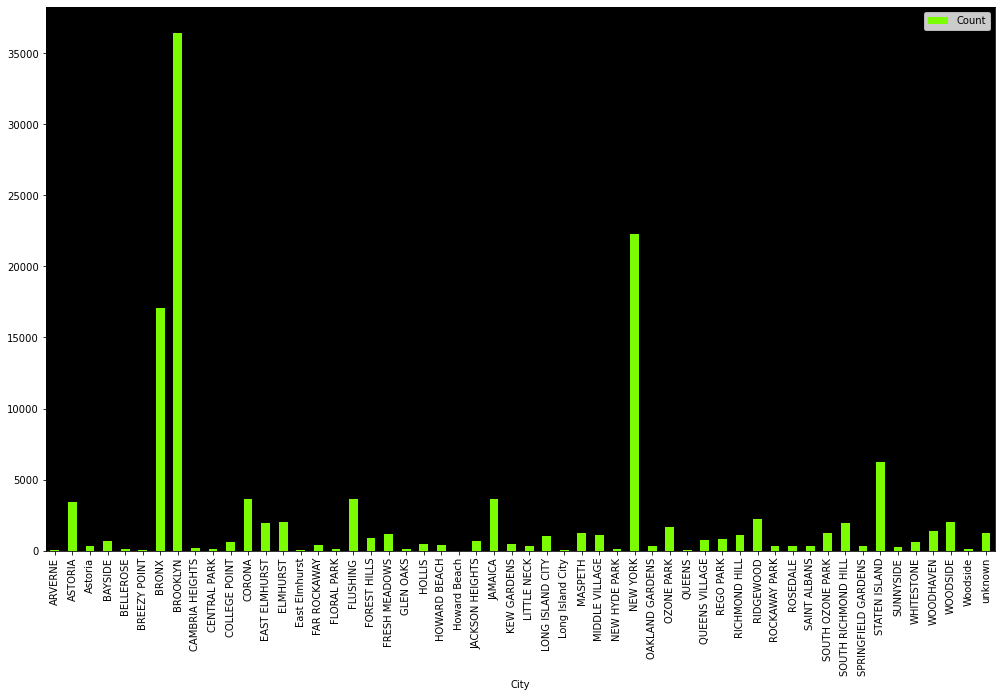

In [73]:
r.plot(kind='bar',stacked=False,figsize=(17,10),color=['lawngreen']).set_facecolor('black')


In [61]:
r['Percentage'] = np.around((r.Count/r.Count.sum())*100,decimals=2)
r

,Borough,Complaint Type,Count,Percentage
City,,,,
ARVERNE,QUEENS,Illegal Parking,62,0.05
ASTORIA,QUEENS,Blocked Driveway,3436,2.69
Astoria,QUEENS,Noise - Commercial,311,0.24
BAYSIDE,QUEENS,Illegal Parking,638,0.50
BELLEROSE,QUEENS,Blocked Driveway,138,0.11
BREEZY POINT,QUEENS,Illegal Parking,16,0.01
BRONX,BRONX,Blocked Driveway,17063,13.36
BROOKLYN,BROOKLYN,Blocked Driveway,36447,28.53
CAMBRIA HEIGHTS,QUEENS,Blocked Driveway,177,0.14


In [62]:
r = r[r.Percentage>1.0]
r = r.reset_index()
r = r.rename(columns={'index':'Complaint Type'})
r

,City,Borough,Complaint Type,Count,Percentage
0,ASTORIA,QUEENS,Blocked Driveway,3436,2.69
1,BRONX,BRONX,Blocked Driveway,17063,13.36
2,BROOKLYN,BROOKLYN,Blocked Driveway,36447,28.53
3,CORONA,QUEENS,Blocked Driveway,3597,2.82
4,EAST ELMHURST,QUEENS,Blocked Driveway,1925,1.51
5,ELMHURST,QUEENS,Blocked Driveway,1992,1.56
6,FLUSHING,QUEENS,Blocked Driveway,3641,2.85
7,JAMAICA,QUEENS,Blocked Driveway,3621,2.83
8,NEW YORK,MANHATTAN,Noise - Street/Sidewalk,22252,17.42
9,OZONE PARK,QUEENS,Blocked Driveway,1681,1.32


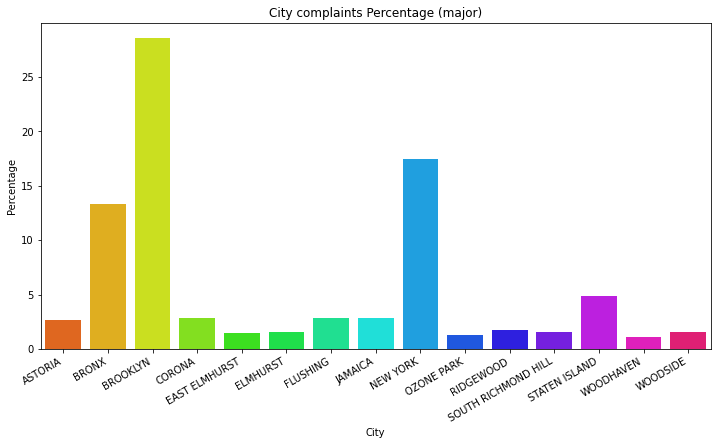

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize=(12,6))
com_type = sns.barplot(x=r['City'],y=r.Percentage,data=r,palette='hsv')
com_type.set_xticklabels(com_type.get_xticklabels(), rotation=30, ha="right")
plt.title('City complaints Percentage (major)')
plt.show()
plt.tight_layout()

## Check if the average response time across various types of complaints

In [64]:
df["Closed Date"]=pd.to_datetime(df['Closed Date'])
df['Created Date']=pd.to_datetime(df['Created Date'])
df['Request_Closing_Time']=df['Closed Date']-df['Created Date']
data= df[['City','Complaint Type','Request_Closing_Time']]
data.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
data

,City,Complaint Type,Request_Closing_Time
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:30
1,ASTORIA,Blocked Driveway,0 days 01:27:13
2,BRONX,Blocked Driveway,0 days 04:51:34
3,BRONX,Illegal Parking,0 days 07:45:27
4,ELMHURST,Illegal Parking,0 days 03:27:44
...,...,...,...
364553,WOODHAVEN,Illegal Parking,0 days 10:17:47
364554,BRONX,Noise - Vehicle,0 days 02:20:34
364555,NEW YORK,Noise - Street/Sidewalk,0 days 00:19:03
364556,BRONX,Blocked Driveway,0 days 02:40:53


In [65]:
data[(data['Request_Closing_Time'].astype(np.int64))>=0]

,City,Complaint Type,Request_Closing_Time
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:30
1,ASTORIA,Blocked Driveway,0 days 01:27:13
2,BRONX,Blocked Driveway,0 days 04:51:34
3,BRONX,Illegal Parking,0 days 07:45:27
4,ELMHURST,Illegal Parking,0 days 03:27:44
...,...,...,...
364553,WOODHAVEN,Illegal Parking,0 days 10:17:47
364554,BRONX,Noise - Vehicle,0 days 02:20:34
364555,NEW YORK,Noise - Street/Sidewalk,0 days 00:19:03
364556,BRONX,Blocked Driveway,0 days 02:40:53


In [66]:
td=data['Request_Closing_Time'].mean()
td

Timedelta('0 days 04:11:53.299632500')

In [67]:
td.components

Components(days=0, hours=4, minutes=11, seconds=53, milliseconds=299, microseconds=632, nanoseconds=500)

## Avarage time gap between logging the complaint and problem solved =  4 hours 11 mins